In [6]:
import numpy as np
import grape as utils
from scipy.linalg import expm
import matplotlib.pyplot as plt
import copy
from scipy.optimize import minimize
from scipy.optimize import Bounds

In [4]:
nions=1
crosstalk=1/300
nsegments = 5
del_t = 12e-6 
tau = nsegments * del_t        
max_amp = 2 * np.pi * 25e3  
# rfi = np.asarray([[1,1]]) 
rfi = np.asarray([[0.99,0.25], [1,0.5],[1.01,0.25]])    
sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,crosstalk)
utarg = expm(-1j * (np.pi / 2 ) * sx[0] / 2) 

In [35]:
nions=1
crosstalk=1/300
nsegments = 5
del_t = 12e-6 
tau = nsegments * del_t        
max_amp = 2 * np.pi * 25e3  
rfi = np.asarray([[1,1]]) 
# rfi = np.asarray([[0.97,0.25], [1,0.5],[1.03,0.25]])    
sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,crosstalk)
utarg = expm(-1j * (np.pi / 2 ) * sx[0] / 2) 

# x0 = np.random.rand(nsegments*2);
x0 = np.asarray([-2.94650661e-01,  8.18969715e-01, -8.72864686e-01, -6.51449500e-01,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.05380167e-06,
       -1.00000000e+00, -1.00000000e+00]) # for no rfi, 5, 12e-6, fun 1.6681861447764845e-07
# x0 = np.asarray([-2.19935595e-01,  7.26539112e-01, -4.82806205e-01, -1.00000000e+00,
#         1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.58481123e-06,
#        -1.00000000e+00, -1.00000000e+00]) # for rfi 5/13e-6
print(utils.calc_fidelity6(x0, nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp))
bnd = Bounds(lb=-np.ones(nsegments*2),ub=np.ones(nsegments*2))
result = minimize(utils.calc_fidelity6,
         x0=x0, 
         args = (nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp),
         method='Nelder-Mead',
         options={'disp':True, 'maxfev':6000*20, 'xatol':1e-9, 'fatol':1e-9},
         bounds=bnd,
        )
result

[-2.94650661e-01  8.18969715e-01 -8.72864686e-01 -6.51449500e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00 -3.05380167e-06
 -1.00000000e+00 -1.00000000e+00]
1.755995349128625e-07
1.6681966918952185e-07
1.6681966918952185e-07
[-2.94650661e-01  8.18969715e-01 -8.72864686e-01 -6.51449500e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00 -3.05380167e-06
 -1.00000000e+00 -1.00000000e+00]
1.755995349128625e-07
1.6681966918952185e-07
[-3.09383194e-01  8.18969715e-01 -8.72864686e-01 -6.51449500e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00 -3.05380167e-06
 -1.00000000e+00 -1.00000000e+00]
2.1791390913961095e-06
0.020756277900824127
[-2.94650661e-01  8.59918201e-01 -8.72864686e-01 -6.51449500e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00 -3.05380167e-06
 -1.00000000e+00 -1.00000000e+00]
1.569100072096319e-05
0.16125656823612333
[-2.94650661e-01  8.18969715e-01 -9.16507920e-01 -6.51449500e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00 -3.05380167e-06
 -1.00000000e+0

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.6681839243304353e-07
             x: [-2.947e-01  8.190e-01 -8.729e-01 -6.514e-01  1.000e+00
                  1.000e+00  1.000e+00 -3.057e-06 -1.000e+00 -1.000e+00]
           nit: 117
          nfev: 311
 final_simplex: (array([[-2.947e-01,  8.190e-01, ..., -1.000e+00,
                        -1.000e+00],
                       [-2.947e-01,  8.190e-01, ..., -1.000e+00,
                        -1.000e+00],
                       ...,
                       [-2.947e-01,  8.190e-01, ..., -1.000e+00,
                        -1.000e+00],
                       [-2.947e-01,  8.190e-01, ..., -1.000e+00,
                        -1.000e+00]]), array([ 1.668e-07,  1.668e-07,  1.668e-07,  1.668e-07,
                        1.668e-07,  1.668e-07,  1.668e-07,  1.668e-07,
                        1.668e-07,  1.668e-07,  1.668e-07]))

In [14]:
x = np.asarray([-0.11441906, -0.11441789,  0.50560341,  0.50562298,  0.76262966,
        0.76264708,  0.65019612,  0.65013456,  0.07667971,  0.07667855,
        0.99346904,  0.99346792,  0.35387403,  0.35389032,  0.12985582,
        0.12985679,  0.9751896 ,  0.97520716,  0.9160752 ,  0.91600888,
        0.69428182,  0.69438679, -0.99409997, -0.99410337,  0.97036885,
        0.97045538,  0.36186828,  0.36186517, -0.05692964, -0.05692911,
        0.90387854,  0.90381554,  0.42563355,  0.42563487,  0.86148804,
        0.8615398 ,  0.6458399 ,  0.64584803,  0.74337593,  0.74332552,
        0.96483256,  0.96490023,  0.02335109,  0.02333233,  0.46450021,
        0.46456893,  0.99557432,  0.99554633,  0.4099365 ,  0.40993474,
        0.42066971,  0.42066455,  0.66397191,  0.66386976,  0.99896986,
        0.99896976, -0.92228019, -0.92227407,  0.50161761,  0.50157802,
        0.6149204 ,  0.61510929,  0.96661556,  0.96657814,  0.31250758,
        0.31245401, -0.34732505, -0.34732664,  0.9883155 ,  0.98831976,
        0.1413437 ,  0.141319  , -0.09048765, -0.09048415, -0.70646504,
       -0.70638837, -0.16738924, -0.16739849, -0.99954327, -0.99954244,
       -0.99938164, -0.99938157,  0.98682221,  0.98681805,  0.2510187 ,
        0.25102647,  0.55327068,  0.55332681, -0.61904103, -0.61904534,
       -0.20576108, -0.20571485, -0.99856919, -0.99856893,  0.07757336,
        0.07757866, -0.69564152, -0.69565277, -0.42582754, -0.42576248,
       -0.13457176, -0.13456345,  0.28398782,  0.28403671, -0.48625625,
       -0.48623003,  0.82990648,  0.82980774,  0.8500306 ,  0.8500978 ,
        0.14104701,  0.1409993 ,  0.50031036,  0.50045216,  0.04034273,
        0.04035974, -0.12545849, -0.12545795,  0.43160654,  0.4317426 ])

x0 = np.repeat(x,2)

In [21]:
np.linspace(0,1/300,5)

array([0.        , 0.00083333, 0.00166667, 0.0025    , 0.00333333])

In [20]:
x0 = np.asarray([-0.11446882, -0.1144687 , -0.11446779, -0.1144698 ,  0.50559037,
        0.50558707,  0.50558174,  0.50561411,  0.76260724,  0.76260185,
        0.76261646,  0.76258312,  0.65016532,  0.65021531,  0.65020751,
        0.65020822,  0.07671807,  0.07671324,  0.0767161 ,  0.0767124 ,
        0.99352304,  0.99352395,  0.99352194,  0.99352163,  0.35393816,
        0.35393555,  0.35394245,  0.35395075,  0.12990971,  0.12991148,
        0.12991114,  0.12991087,  0.97518235,  0.97518246,  0.97520868,
        0.97521398,  0.91599005,  0.91602584,  0.91594233,  0.91592633,
        0.69432073,  0.69426556,  0.69435826,  0.69436084, -0.99413962,
       -0.99413963, -0.99414949, -0.99414919,  0.97032696,  0.97032648,
        0.97044102,  0.97045377,  0.36191759,  0.3619184 ,  0.36191623,
        0.36191721, -0.05696056, -0.05696111, -0.05696021, -0.05696427,
        0.90385522,  0.90376464,  0.90384431,  0.90373662,  0.42566405,
        0.42566323,  0.42566337,  0.42563803,  0.86148438,  0.86151955,
        0.86147963,  0.8614511 ,  0.64591879,  0.64591876,  0.6459235 ,
        0.64592283,  0.74328715,  0.74331885,  0.7432656 ,  0.74324911,
        0.96477115,  0.96481725,  0.96486883,  0.96483354,  0.0233614 ,
        0.0233619 ,  0.02334361,  0.02334346,  0.4645032 ,  0.46449956,
        0.46456708,  0.4645357 ,  0.99559794,  0.99559847,  0.99557289,
        0.99555593,  0.40997229,  0.40997301,  0.40997186,  0.40998877,
        0.42070163,  0.42070358,  0.42069964,  0.42071747,  0.66393013,
        0.66391379,  0.66388862,  0.66391164,  0.99897916,  0.99897968,
        0.99897877,  0.9989785 , -0.92225128, -0.92224843, -0.92226197,
       -0.92226858,  0.50158568,  0.50161732,  0.50155497,  0.50156703,
        0.61498756,  0.61498432,  0.6151234 ,  0.6150655 ,  0.96657456,
        0.96664401,  0.96652201,  0.96652963,  0.31254606,  0.31253184,
        0.31246403,  0.31246296, -0.34736052, -0.34737636, -0.3473772 ,
       -0.34736306,  0.98837623,  0.98837608,  0.9883838 ,  0.9883841 ,
        0.14138279,  0.14138337,  0.14136878,  0.14137316, -0.0905147 ,
       -0.09049954, -0.09051011, -0.0904967 , -0.70652304, -0.70644464,
       -0.7064465 , -0.70644545, -0.1674435 , -0.16743754, -0.16743803,
       -0.1674461 , -0.99955122, -0.99955245, -0.99955148, -0.99955145,
       -0.99939624, -0.99939622, -0.99939597, -0.99939599,  0.98688451,
        0.98688747,  0.98688327,  0.98687919,  0.25108348,  0.25108307,
        0.25108717,  0.25109023,  0.55334885,  0.55334253,  0.55336063,
        0.55333033, -0.6191188 , -0.6191159 , -0.61912201, -0.61911533,
       -0.20575558, -0.20578477, -0.20574107, -0.20574159, -0.99859417,
       -0.99859421, -0.99859384, -0.99859388,  0.07758959,  0.07758911,
        0.07758997,  0.07759341, -0.69571022, -0.69571113, -0.69571286,
       -0.69572092, -0.42579637, -0.42583379, -0.42579522, -0.4258021 ,
       -0.13462172, -0.134622  , -0.13461596, -0.13461625,  0.28405564,
        0.28400479,  0.28407669,  0.28402676, -0.48631185, -0.48633411,
       -0.48630847, -0.48630896,  0.8299828 ,  0.82998229,  0.82988395,
        0.82988282,  0.8500834 ,  0.85005691,  0.85015434,  0.85012502,
        0.14110047,  0.14107344,  0.14105319,  0.1410531 ,  0.50034032,
        0.50031001,  0.50041533,  0.50041187,  0.04037305,  0.04037294,
        0.04038992,  0.04038985, -0.12550947, -0.1255091 , -0.1255111 ,
       -0.12551065,  0.43168224,  0.43166974,  0.43179418,  0.43179671])

In [29]:
x0 = np.asarray([-0.11446882, -0.1144687 , -0.11446779, -0.1144698 ,  0.50559037,
        0.50558707,  0.50558174,  0.50561411,  0.76260724,  0.76260185,
        0.76261646,  0.76258312,  0.65016532,  0.65021531,  0.65020751,
        0.65020822,  0.07671807,  0.07671324,  0.0767161 ,  0.0767124 ,
        0.99352304,  0.99352395,  0.99352194,  0.99352163,  0.35393816,
        0.35393555,  0.35394245,  0.35395075,  0.12990971,  0.12991148,
        0.12991114,  0.12991087,  0.97518235,  0.97518246,  0.97520868,
        0.97521398,  0.91599005,  0.91602584,  0.91594233,  0.91592633,
        0.69432073,  0.69426556,  0.69435826,  0.69436084, -0.99413962,
       -0.99413963, -0.99414949, -0.99414919,  0.97032696,  0.97032648,
        0.97044102,  0.97045377,  0.36191759,  0.3619184 ,  0.36191623,
        0.36191721, -0.05696056, -0.05696111, -0.05696021, -0.05696427,
        0.90385522,  0.90376464,  0.90384431,  0.90373662,  0.42566405,
        0.42566323,  0.42566337,  0.42563803,  0.86148438,  0.86151955,
        0.86147963,  0.8614511 ,  0.64591879,  0.64591876,  0.6459235 ,
        0.64592283,  0.74328715,  0.74331885,  0.7432656 ,  0.74324911,
        0.96477115,  0.96481725,  0.96486883,  0.96483354,  0.0233614 ,
        0.0233619 ,  0.02334361,  0.02334346,  0.4645032 ,  0.46449956,
        0.46456708,  0.4645357 ,  0.99559794,  0.99559847,  0.99557289,
        0.99555593,  0.40997229,  0.40997301,  0.40997186,  0.40998877,
        0.42070163,  0.42070358,  0.42069964,  0.42071747,  0.66393013,
        0.66391379,  0.66388862,  0.66391164,  0.99897916,  0.99897968,
        0.99897877,  0.9989785 , -0.92225128, -0.92224843, -0.92226197,
       -0.92226858,  0.50158568,  0.50161732,  0.50155497,  0.50156703,
        0.61498756,  0.61498432,  0.6151234 ,  0.6150655 ,  0.96657456,
        0.96664401,  0.96652201,  0.96652963,  0.31254606,  0.31253184,
        0.31246403,  0.31246296, -0.34736052, -0.34737636, -0.3473772 ,
       -0.34736306,  0.98837623,  0.98837608,  0.9883838 ,  0.9883841 ,
        0.14138279,  0.14138337,  0.14136878,  0.14137316, -0.0905147 ,
       -0.09049954, -0.09051011, -0.0904967 , -0.70652304, -0.70644464,
       -0.7064465 , -0.70644545, -0.1674435 , -0.16743754, -0.16743803,
       -0.1674461 , -0.99955122, -0.99955245, -0.99955148, -0.99955145,
       -0.99939624, -0.99939622, -0.99939597, -0.99939599,  0.98688451,
        0.98688747,  0.98688327,  0.98687919,  0.25108348,  0.25108307,
        0.25108717,  0.25109023,  0.55334885,  0.55334253,  0.55336063,
        0.55333033, -0.6191188 , -0.6191159 , -0.61912201, -0.61911533,
       -0.20575558, -0.20578477, -0.20574107, -0.20574159, -0.99859417,
       -0.99859421, -0.99859384, -0.99859388,  0.07758959,  0.07758911,
        0.07758997,  0.07759341, -0.69571022, -0.69571113, -0.69571286,
       -0.69572092, -0.42579637, -0.42583379, -0.42579522, -0.4258021 ,
       -0.13462172, -0.134622  , -0.13461596, -0.13461625,  0.28405564,
        0.28400479,  0.28407669,  0.28402676, -0.48631185, -0.48633411,
       -0.48630847, -0.48630896,  0.8299828 ,  0.82998229,  0.82988395,
        0.82988282,  0.8500834 ,  0.85005691,  0.85015434,  0.85012502,
        0.14110047,  0.14107344,  0.14105319,  0.1410531 ,  0.50034032,
        0.50031001,  0.50041533,  0.50041187,  0.04037305,  0.04037294,
        0.04038992,  0.04038985, -0.12550947, -0.1255091 , -0.1255111 ,
       -0.12551065,  0.43168224,  0.43166974,  0.43179418,  0.43179671])

In [30]:
nions=1
crosstalk=1/300
nsegments = 60 *2
del_t = 1e-6 / 4
tau = nsegments * del_t        
max_amp = 2 * np.pi * 25e3  
rfi = np.asarray([[1,1]]) 
# rfi = np.asarray([[0.98,0.25], [1,0.5],[1.02,0.25]])    
sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,crosstalk)
utarg = expm(-1j * (np.pi / 2 ) * sx[0] / 2) 

# x0 = np.random.rand(nsegments*2);
# x0 = np.asarray([-2.94650661e-01,  8.18969715e-01, -8.72864686e-01, -6.51449500e-01,
#         1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.05380167e-06,
#        -1.00000000e+00, -1.00000000e+00]) # for no rfi, 5, 12e-6, fun 1.6681861447764845e-07
# x0 = np.asarray([-2.19935595e-01,  7.26539112e-01, -4.82806205e-01, -1.00000000e+00,
#         1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.58481123e-06,
#        -1.00000000e+00, -1.00000000e+00]) # for rfi 5/13e-6
ctlist=[0., 0.0001, 0.0002]
print(utils.calc_fidelity6_ct(x0, nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp,ctlist))
bnd = Bounds(lb=-np.ones(nsegments*2),ub=np.ones(nsegments*2))
result = minimize(utils.calc_fidelity6_ct,
         x0=x0, 
         args = (nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp, ctlist),
         method='Nelder-Mead',
         options={'disp':True, 'maxfev':1000, 'xatol':1e-9, 'fatol':1e-9},
         bounds=bnd,
        )
# result = minimize(utils.calc_fidelity6,
#          x0=x0, 
#          args = (nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp),
#          method='L-BFGS-B',
#          options={'disp':True},
#          bounds=bnd,
#         )
result

1.5897207994441942e-05
7.948605662555508e-06
7.948605662555508e-06
1.5897207994441942e-05
7.948605662555508e-06
1.589404829971386e-05
2.3731965836937263e-05
1.589404829971386e-05
2.3731945297811308e-05
1.589404829971386e-05
2.3731704379414964e-05
1.589404829971386e-05
2.373226781759996e-05
1.5911172379645677e-05
0.00031591104288075655
1.5911172379645677e-05
0.00031590695281913383
1.5911172379645677e-05
0.0003159003814090511
1.5911172379645677e-05
0.000315939736594828
1.591827558655723e-05
0.0007086283221324763
1.5918276696780254e-05
0.0007086183856364059
1.5918276696780254e-05
0.0007086451969673391
1.591827558655723e-05
0.0007085838993337035
1.5915169182534328e-05
0.0005172400996400484
1.5915171402980377e-05
0.0005173184480788962
1.5915170292757352e-05
0.000517306247282967
1.5915170292757352e-05
0.0005173073874820133
1.5899326299972927e-05
1.5040836909285815e-05
1.589932741019595e-05
1.503993318774377e-05
1.589932741019595e-05
1.5040456657899881e-05
1.5899326299972927e-05
1.50397705400

KeyboardInterrupt: 

In [28]:
result.x
# array([ 1.        , -0.82672154, -0.64492554,  1.        ,  0.03228428,
#         0.99853601,  0.9988478 , -0.96895388, -0.21276108, -0.99999937])

array([-0.11446882, -0.1144687 , -0.11446779, -0.1144698 ,  0.50559037,
        0.50558707,  0.50558174,  0.50561411,  0.76260724,  0.76260185,
        0.76261646,  0.76258312,  0.65016532,  0.65021531,  0.65020751,
        0.65020822,  0.07671807,  0.07671324,  0.0767161 ,  0.0767124 ,
        0.99352304,  0.99352395,  0.99352194,  0.99352163,  0.35393816,
        0.35393555,  0.35394245,  0.35395075,  0.12990971,  0.12991148,
        0.12991114,  0.12991087,  0.97518235,  0.97518246,  0.97520868,
        0.97521398,  0.91599005,  0.91602584,  0.91594233,  0.91592633,
        0.69432073,  0.69426556,  0.69435826,  0.69436084, -0.99413962,
       -0.99413963, -0.99414949, -0.99414919,  0.97032696,  0.97032648,
        0.97044102,  0.97045377,  0.36191759,  0.3619184 ,  0.36191623,
        0.36191721, -0.05696056, -0.05696111, -0.05696021, -0.05696427,
        0.90385522,  0.90376464,  0.90384431,  0.90373662,  0.42566405,
        0.42566323,  0.42566337,  0.42563803,  0.86148438,  0.86

In [19]:
print(utils.calc_fidelity6_ct(result.x, nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp,ctlist))


0.0
-2.6645352591003757e-11
-2.6645352591003757e-11


In [57]:
x0 = np.asarray([-2.19935595e-01,  7.26539112e-01, -4.82806205e-01, -1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.58481123e-06,
       -1.00000000e+00, -1.00000000e+00]) # for rfi 5/13e-6
print(utils.calc_fidelity6(x0, nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp))

[-2.19935595e-01  7.26539112e-01 -4.82806205e-01 -1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00 -3.58481123e-06
 -1.00000000e+00 -1.00000000e+00]
6.341597247327968e-06
0.10909091303651364
0.10909091303651364


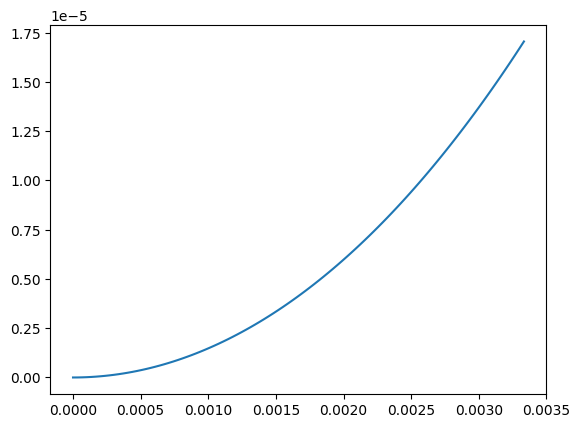

In [65]:
newx = copy.deepcopy(result.x)
# newx = np.asarray([-2.94650661e-01,  8.18969715e-01, -8.72864686e-01, -6.51449500e-01,
#         1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.05380167e-06,
#        -1.00000000e+00, -1.00000000e+00]) # for no rfi, 5, 12e-6, fun 1.6681861447764845e-07

# newx = np.asarray([-2.19935595e-01,  7.26539112e-01, -4.82806205e-01, -1.00000000e+00,
#         1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.58481123e-06,
#        -1.00000000e+00, -1.00000000e+00]) # for rfi 5/13e-6
ross = np.linspace(0,1/300,100)
infid = []
for r in ross:
    infid.append(utils.calc_fidelity5(newx * r,nsegments, np.asarray([[1,1]]) , ssx, ssy, np.eye(2), del_t, nions, max_amp))
    
plt.plot(ross,infid)


In [90]:
newx = copy.deepcopy(result.x)
# newx = np.asarray([-0.36674613,  0.86673907, -0.99961336, -0.55134774,  1.        ,
#         1.        ,  1.        , -0.01835364, -1.        , -1.        ]) # for no rfi, 5, 11e-6, fun 2.5964316363591422e-05
utils.calc_fidelity5(newx ,nsegments, np.asarray([[1,1]]) , ssx, ssy, utarg, del_t, nions, max_amp)


0.0030691188745990416

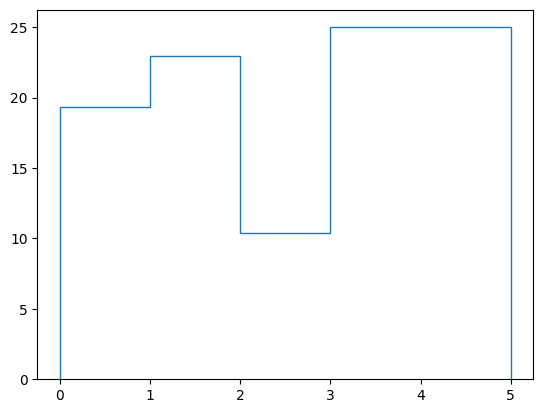

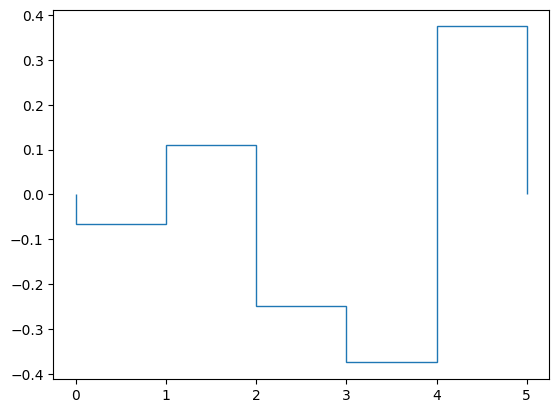

In [26]:
u=result.x
# u = newx
ux = u[0:nsegments] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
uy = u[nsegments:] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
plt.stairs(np.sqrt(ux**2+uy**2))
plt.figure()
plt.stairs(np.arctan2(ux,uy)/2/np.pi)


5.599341657003265e-05
0.545677514376397


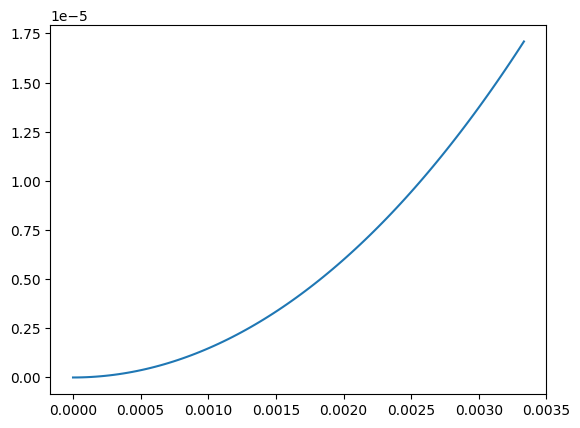

In [13]:
newx = copy.deepcopy(result.x)
# newx = np.asarray([-2.19935595e-01,  7.26539112e-01, -4.82806205e-01, -1.00000000e+00,
#         1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.58481123e-06,
#        -1.00000000e+00, -1.00000000e+00]) # for rfi 5/13e-6
nions=1
crosstalk=1/300
nsegments = 5
del_t = 13e-6 
tau = nsegments * del_t        
max_amp = 2 * np.pi * 25e3  
# rfi = np.asarray([[1,1]]) 
rfi = np.asarray([[0.99,0.25], [1,0.5],[1.01,0.25]])    
sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,crosstalk)
utarg = expm(-1j * (np.pi / 2 ) * sx[0] / 2) 



ross = np.linspace(0,1/300,100)
infid = []
for r in ross:
    infid.append(utils.calc_fidelity5(newx * r,nsegments, np.asarray([[1,1]]) , ssx, ssy, np.eye(2), del_t, nions, max_amp))
    
plt.plot(ross,infid)


print(utils.calc_fidelity5(newx ,nsegments, np.asarray([[1,1]]) , ssx, ssy, utarg, del_t, nions, max_amp))
print(utils.calc_fidelity5(newx ,nsegments, rfi , ssx, ssy, utarg, del_t, nions, max_amp))



In [36]:
dev = 1
a=-dev
b=dev

distor_all = []
infid = []
for j in range(5000):
    distortu = np.zeros(nsegments*2)
    for k in range(nsegments*2):
        dev_per = (b - a) * np.random.rand() + a
        distortu[k] = newx[k] * ( 1 + dev_per / 100)
        
    distor_all.append(distortu)
    infid.append(utils.calc_fidelity5(distortu ,nsegments, np.asarray([[1,1]]) , ssx, ssy, utarg, del_t, nions, max_amp))



(0.0, 50.0)

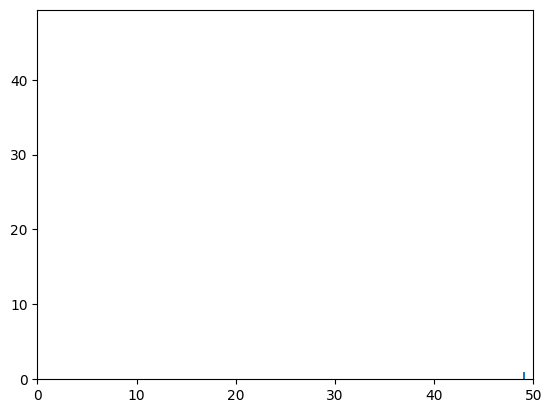

In [37]:
bn =np.arange(0,max(infid),0.1)
ax = plt.hist(infid, bins = bn, rwidth=0.9 )
plt.xlim([0,50])

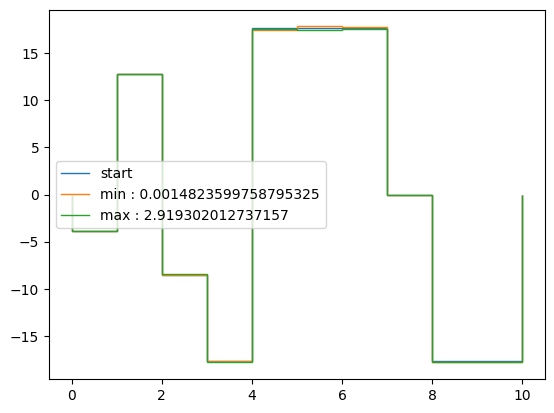

In [16]:
indxmin = np.argmin(infid)
indxmax = np.argmax(infid)
disu_min = distor_all[indxmin]
disu_max = distor_all[indxmax]
plt.stairs([ amp*max_amp/np.sqrt(2)/2/np.pi/1e3 for amp in newx], label = 'start')
plt.stairs([ amp*max_amp/np.sqrt(2)/2/np.pi/1e3 for amp in disu_min], label = f'min : {infid[indxmin]}')
plt.stairs([ amp*max_amp/np.sqrt(2)/2/np.pi/1e3 for amp in disu_max], label = f'max : {infid[indxmax]}')
plt.legend()

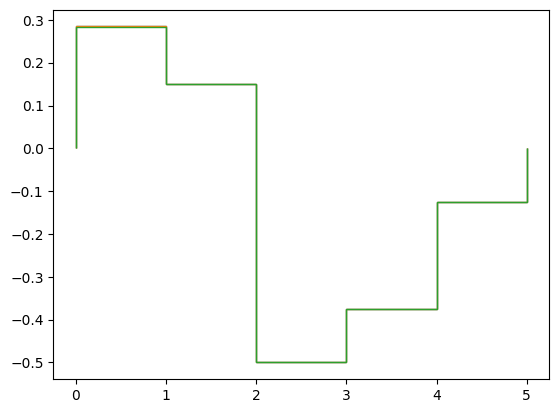

In [17]:
u=disu_min

ux = u[0:nsegments] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
uy = u[nsegments:] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
plt.stairs(np.arctan2(uy,ux)/2/np.pi)

u=disu_max
ux = u[0:nsegments] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
uy = u[nsegments:] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
plt.stairs(np.arctan2(uy,ux)/2/np.pi)

u=newx
ux = u[0:nsegments] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
uy = u[nsegments:] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
plt.stairs(np.arctan2(uy,ux)/2/np.pi)


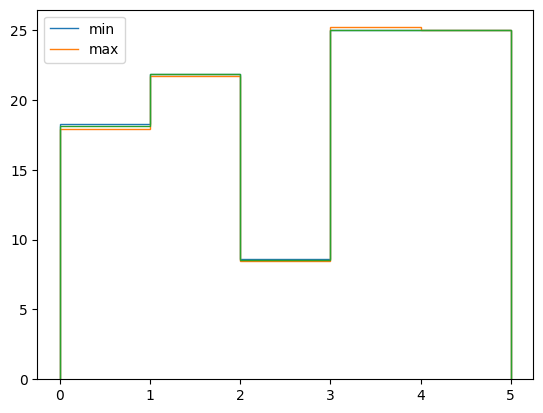

In [18]:
u=disu_min

ux = u[0:nsegments] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
uy = u[nsegments:] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
plt.stairs(np.sqrt(ux**2+uy**2),label='min')

u=disu_max
ux = u[0:nsegments] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
uy = u[nsegments:] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
plt.stairs(np.sqrt(ux**2+uy**2),label='max')

u=newx
ux = u[0:nsegments] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
uy = u[nsegments:] * max_amp / np.sqrt(2) / 1e3 / 2 / np.pi
plt.stairs(np.sqrt(ux**2+uy**2))

plt.legend()

In [67]:
nions=1
crosstalk=1/300
nsegments = 5
del_t = 13e-6 
tau = nsegments * del_t        
max_amp = 2 * np.pi * 25e3  
sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,crosstalk)
utarg = expm(-1j * (np.pi / 2 ) * sx[0] / 2) 

u = copy.deepcopy(result.x)
# u = np.asarray([-2.19935595e-01,  7.26539112e-01, -4.82806205e-01, -1.00000000e+00,
#         1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.58481123e-06,
#        -1.00000000e+00, -1.00000000e+00]) # for rfi 5/13e-6

ux = u[0:nsegments] * max_amp / np.sqrt(2) 
uy = u[nsegments:] * max_amp / np.sqrt(2)

amp = np.sqrt(ux**2+uy**2)
phi = np.arctan2(uy,ux)

utils.calc_fidelity_5_ampphi(amp, phi , nsegments, np.asarray([[1,1]]), ssx, ssy, utarg, del_t, nions)
# utils.calc_fidelity5(u ,nsegments, np.asarray([[1,1]]) , ssx, ssy, utarg, del_t, nions, max_amp)

0.0045050341501706725

In [91]:
#systematc change

u = copy.deepcopy(result.x)
# u = np.asarray([-2.19935595e-01,  7.26539112e-01, -4.82806205e-01, -1.00000000e+00,
#         1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.58481123e-06,
#        -1.00000000e+00, -1.00000000e+00]) # for rfi 5/13e-6

ux = u[0:nsegments] * max_amp / np.sqrt(2) 
uy = u[nsegments:] * max_amp / np.sqrt(2)

amp = np.sqrt(ux**2+uy**2)
phi = np.arctan2(uy,ux)

dev_per = np.linspace(.99,1.01,100)

distor_all_amp = []
distor_all_phi = []
infid = []
for amp_dev in dev_per:
    for phi_dev in dev_per:
        distort_amp = np.zeros(nsegments)
        distort_phi = np.zeros(nsegments)
        for k in range(nsegments):
            distort_amp[k] = amp[k] * amp_dev
            distort_phi[k] = phi[k] * phi_dev
            
        distor_all_amp.append(distort_amp)
        distor_all_phi.append(distort_phi)
        infid.append(utils.calc_fidelity_5_ampphi(distort_amp, distort_phi , nsegments, np.asarray([[1,1]]), ssx, ssy, utarg, del_t, nions))


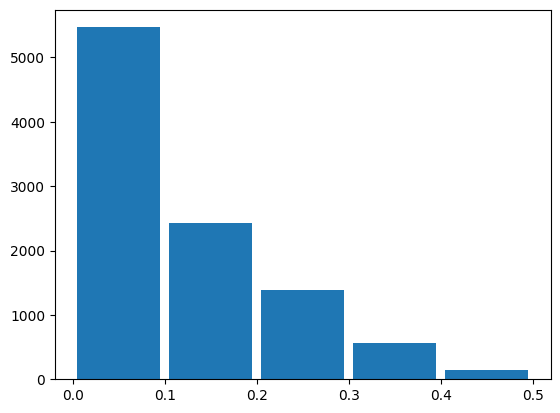

In [93]:
bn =np.arange(0,max(infid),.1)
ax = plt.hist(infid, bins = bn, rwidth=0.9 )

In [94]:
dev0 = 1
a0=-dev0
b0=dev0

dev1 = 1
a1=-dev1
b1=dev1

u = copy.deepcopy(result.x)
# u = np.asarray([-2.19935595e-01,  7.26539112e-01, -4.82806205e-01, -1.00000000e+00,
#         1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.58481123e-06,
#        -1.00000000e+00, -1.00000000e+00]) # for rfi 5/13e-6

ux = u[0:nsegments] * max_amp / np.sqrt(2) 
uy = u[nsegments:] * max_amp / np.sqrt(2)

amp = np.sqrt(ux**2+uy**2)
phi = np.arctan2(uy,ux)

distor_all_amp = []
distor_all_phi = []
infid = []
for j in range(10000):
    distort_amp = np.zeros(nsegments)
    distort_phi = np.zeros(nsegments)
    for k in range(nsegments):
        dev_per0 = (b0 - a0) * np.random.rand() + a0
        dev_per1 = (b1 - a1) * np.random.rand() + a1
        distort_amp[k] = amp[k] * ( 1 + dev_per0 / 100)
        distort_phi[k] = phi[k] * ( 1 + dev_per1 / 100)
        
    distor_all_amp.append(distort_amp)
    distor_all_phi.append(distort_phi)
    infid.append(utils.calc_fidelity_5_ampphi(distort_amp, distort_phi , nsegments, np.asarray([[1,1]]), ssx, ssy, utarg, del_t, nions))


(0.0, 17.5)

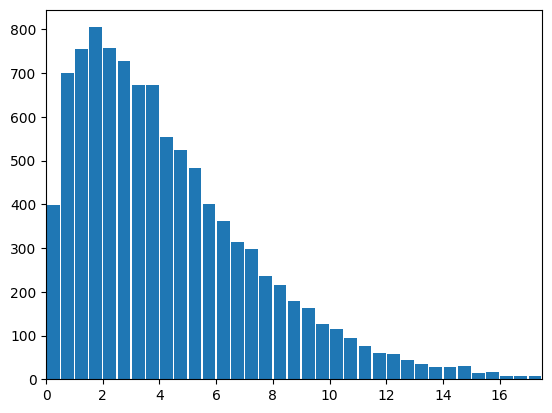

In [95]:
bn =np.arange(0,max(infid),.5)
ax = plt.hist(infid, bins = bn, rwidth=0.9 )
plt.xlim([0,17.5])

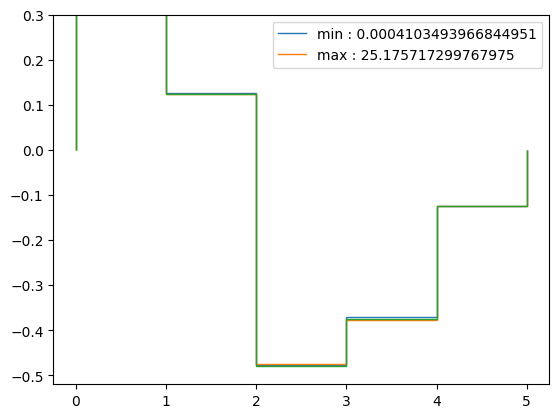

In [96]:
indxmin = np.argmin(infid)
indxmax = np.argmax(infid)
disu_min = distor_all_phi[indxmin]
disu_max = distor_all_phi[indxmax]

plt.stairs(disu_min/2/np.pi,label = f'min : {infid[indxmin]}')
plt.stairs(disu_max/2/np.pi,label = f'max : {infid[indxmax]}')
plt.stairs(phi/2/np.pi)
plt.ylim([-0.52,0.3])
plt.legend()

In [24]:
dev0 = 1
a0=-dev0
b0=dev0

dev1 = 1
a1=-dev1
b1=dev1

u = np.asarray([-2.19935595e-01,  7.26539112e-01, -4.82806205e-01, -1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.58481123e-06,
       -1.00000000e+00, -1.00000000e+00]) # for rfi 5/13e-6

ux = u[0:nsegments] * max_amp / np.sqrt(2) 
uy = u[nsegments:] * max_amp / np.sqrt(2)

amp = np.sqrt(ux**2+uy**2)
phi = np.arctan2(uy,ux)

distor_all_amp = []
distor_all_phi = []
infid = []
for j in range(10000):
    distort_amp = np.zeros(nsegments)
    distort_phi = np.zeros(nsegments)
    for k in range(nsegments):
        dev_per0 = (b0 - a0) * np.random.rand() + a0
        dev_per1 = (b1 - a1) * np.random.rand() + a1
        distort_amp[k] = amp[k] * ( 1 + dev_per0 / 100)
        distort_phi[k] = phi[k] * ( 1 + dev_per1 / 100)
        
    distor_all_amp.append(distort_amp)
    distor_all_phi.append(distort_phi)
    infid.append(utils.calc_fidelity_5_ampphi(distort_amp*1/300, distort_phi , nsegments, np.asarray([[1,1]]), ssx, ssy, np.eye(2), del_t, nions))


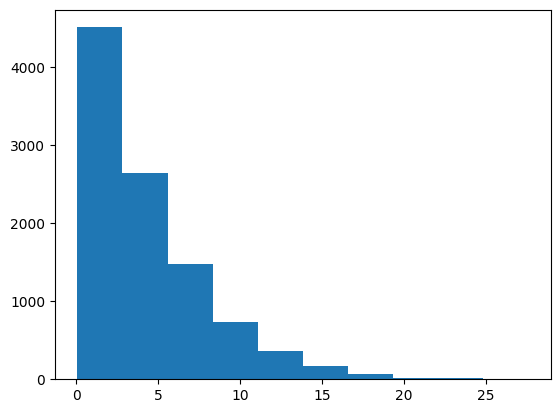

In [26]:
# bn =np.arange(0,max(infid),1)
# ax = plt.hist(infid, bins = bn, rwidth=0.9 )
ax = plt.hist([val*1e5 for val in infid])